In [9]:
from pathlib import Path
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.cluster import DBSCAN
import simplekml
from smount_predictors import SeamountHelp
import xarray as xr

In [10]:
training_bounds = SeamountHelp.readKMLbounds(Path('data') / 'Seamount_training_zone.kml')
points = SeamountHelp.read_seamount_centers(Path('data') / 'Seamount_training_zone.kml')
srtm = SeamountHelp.readAndFilterGRD(Path('data') / 'srtm15_V2.5.nc', training_bounds[:2], training_bounds[2:])

In [11]:
points.drop(index='mh37', inplace=True)

In [47]:
parameter = -3000
filtered_srtm = srtm.where(srtm['z'] > parameter)

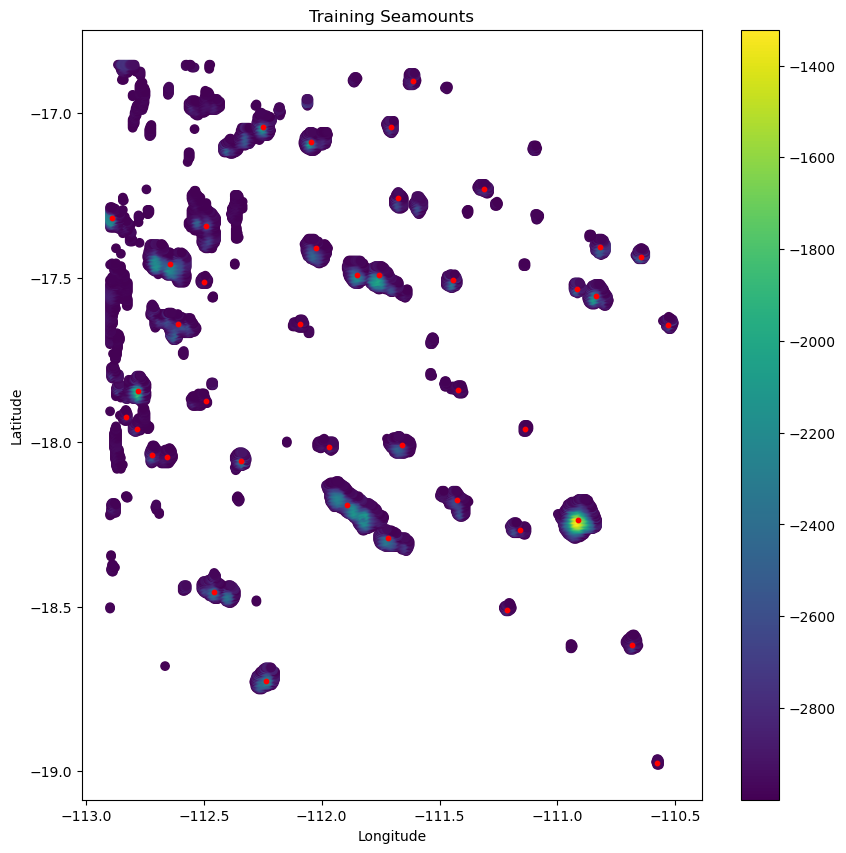

In [48]:
fig = SeamountHelp.plot_xarr(filtered_srtm, 'Training Seamounts', backend='plt')
ax = fig.get_axes()[0]
ax.scatter(points['lon'], points['lat'], c='r', s=10);

In [106]:
labled_srtm = pd.read_csv(Path('data') / 'clustered_seamounts.csv')

In [107]:
data = filtered_srtm.to_dataframe()
# data = data.dropna()
merged = labled_srtm.merge(data, on=['lat', 'lon'], how='right')
# merged = merged[['lat', 'lon', 'z', 'cluster']]
merged.dropna(subset=['cluster'], inplace=True)
merged = merged[['lat', 'lon', 'z', 'cluster']]
merged.dropna(inplace=True)
merged

,lat,lon,z,cluster
37423,-18.981250,-110.568750,-2993.500000,43.0
37999,-18.977083,-110.568750,-2979.532715,43.0
38572,-18.972917,-110.581250,-2999.500000,43.0
38575,-18.972917,-110.568750,-2973.284180,43.0
39151,-18.968750,-110.568750,-2985.806396,43.0
...,...,...,...,...
327475,-16.881250,-111.618750,-2926.999756,44.0
327478,-16.881250,-111.606250,-2901.999756,44.0
327479,-16.881250,-111.602083,-2934.000000,44.0
328051,-16.877083,-111.618750,-2951.999756,44.0


In [108]:
drop_clusters = []
drop_clusters = [92, 0, 86]

In [109]:
merged = merged[~merged['cluster'].isin(drop_clusters)]
fig = px.scatter(merged, y='lat', x='lon', color='cluster')
fig.update_layout(
    width=800,
    height=800,
)
fig.add_trace(px.scatter(points, y='lat', x='lon').data[0])

In [105]:
merged.to_csv(Path('data') / 'clustered_seamounts.csv', index=False)